# Exploratory Data Analysis Starter

## Import packages

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [2]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [3]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [4]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [5]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
id                                14606 non-null object
channel_sales                     14606 non-null object
cons_12m                          14606 non-null int64
cons_gas_12m                      14606 non-null int64
cons_last_month                   14606 non-null int64
date_activ                        14606 non-null object
date_end                          14606 non-null object
date_modif_prod                   14606 non-null object
date_renewal                      14606 non-null object
forecast_cons_12m                 14606 non-null float64
forecast_cons_year                14606 non-null int64
forecast_discount_energy          14606 non-null float64
forecast_meter_rent_12m           14606 non-null float64
forecast_price_energy_off_peak    14606 non-null float64
forecast_price_energy_peak        14606 non-null float64
forecast_price_pow_off_peak       14606 non-null f

In [5]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
id                    193002 non-null object
price_date            193002 non-null object
price_off_peak_var    193002 non-null float64
price_peak_var        193002 non-null float64
price_mid_peak_var    193002 non-null float64
price_off_peak_fix    193002 non-null float64
price_peak_fix        193002 non-null float64
price_mid_peak_fix    193002 non-null float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [6]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [15]:
# price_df.describe()
price_df.columns
# how many different value in group by: nunique()
price_avg_id = price_df.groupby(["id"])['price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix'].mean().reset_index()
price_avg_id = price_avg_id.merge(client_df,how="inner",on="id")[['id','price_off_peak_var',
       'price_peak_var','price_mid_peak_var','price_off_peak_fix','price_peak_fix',
       'price_mid_peak_fix','churn']]
price_avg_id.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,churn
count,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,0.142327,0.052063,0.028276,42.928890,9.460874,6.097680,0.097152
std,0.022512,0.049879,0.035802,4.550759,12.053587,7.770748,0.296175
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.124430,0.000000,0.000000,40.688156,0.000000,0.000000,0.000000
50%,0.147630,0.084509,0.000000,44.281745,0.000000,0.000000,0.000000
75%,0.150415,0.102479,0.072833,44.370635,24.372163,16.248109,0.000000
max,0.278098,0.196275,0.102951,59.286190,36.490689,16.818917,1.000000


### Price Data Cleansing

Just remove all the 0 values and their corresponding users in fixed and variable electricity prices since there maybe mistake of recording data. There're 105 clients with abnormal fixed price of 0 and 20 clients with variable price of 0.

In [22]:
print("Before removing all 0 in fixed price:"+str(len(price_avg_id[price_avg_id["price_off_peak_fix"]==0])))
price_avg_fix = price_avg_id.drop(price_avg_id[price_avg_id.price_off_peak_fix==0].index)
print("After removing all 0 in fixed price:"+str(len(price_avg_fix[price_avg_fix["price_off_peak_fix"]==0])))

Before removing all 0 in fixed price:105
After removing all 0 in fixed price:0


In [23]:
print("Before removing all 0 in fixed price:"+str(len(price_avg_id[price_avg_id["price_off_peak_var"]==0])))
price_avg_var = price_avg_id.drop(price_avg_id[price_avg_id.price_off_peak_var==0].index)
print("After removing all 0 in fixed price:"+str(len(price_avg_var[price_avg_var["price_off_peak_var"]==0])))

Before removing all 0 in fixed price:20
After removing all 0 in fixed price:0


### Other 2 Dimensions of Price Data Pre-processing

We want to see churn rate's relationships with how many times of price change the clients expeienced and what rate of overall change in price they experienced in 2015. The rate of price change is an one-time calculated rate for we only calculate what's the rate of change of the price in the end of 2015 to that at the start of 2015. The formmula is 
$$rate of price change = \frac{price_{Dec,2015}-price_{Jan,2015}}{price_{Jan,2015}}$$

In [30]:
# id_dict = dict.fromkeys(list(price_df["id"].unique()),{"num of price change":0,"percentage of price change":0})
id_dict = {}
time_of_change = 0
start_price = price_df["price_off_peak_fix"][0]
rate_of_change = 0
for i in range(1,len(price_df)):
    
    if price_df["id"][i-1] == price_df["id"][i]:
        if price_df["price_off_peak_fix"][i-1] != price_df["price_off_peak_fix"][i]:
            time_of_change += 1
    else:
        if start_price != 0:
#             print(price_df["price_off_peak_fix"][i-1])
#             print(start_price)
            rate_of_change = (price_df["price_off_peak_fix"][i-1]-start_price)/start_price
        else:
            rate_of_change = None
        id_dict[price_df["id"][i-1]] = {"num of price change":time_of_change,
                                        "percentage of price change":rate_of_change}
        time_of_change = 0
        start_price = price_df["price_off_peak_fix"][i]
        
id_dict

In [43]:
# price_by_id = pd.DataFrame(id_dict,index=id_dict.keys())
price_by_id = pd.DataFrame.from_dict(id_dict, orient='index').reset_index()
price_by_id.rename(columns={"index":"id"},inplace=True)
price_by_id = price_by_id.merge(client_df,how="inner",on="id")[["id","num of price change",
                                                              "percentage of price change","churn"]]
price_by_id.head()

,id,num of price change,percentage of price change,churn
0,0002203ffbb812588b632b9e628cc38d,1,4.016066e-03,0
1,0004351ebdd665e6ee664792efc4fd13,1,4.016063e-03,0
2,0010bcc39e42b3c2131ed2ce55246e3c,1,3.374980e-02,0
3,00114d74e963e47177db89bc70108537,1,-2.710827e-08,0
4,0013f326a839a2f6ad87a1859952d227,0,0.000000e+00,0


---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

In [18]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

Define the function for calculating churn rate for every histgram groups.

In [64]:
def churn_rate_by_group(df,column,n):
#     df_data_order = df.sort_values(by=[column],ascending=[True])
    min_v = min(df[column])
    max_v = max(df[column])
    diff = (max_v-min_v)/n
    data = {}
    for index,row in df.iterrows():
        a = np.floor((row[column]-min_v)/diff)
        if a not in data.keys():
            data[a] = [index]
        else:
            data[a].append(index)
    c = []
    for i in range(len(data)):
        if i in data.keys():
            avg = df["churn"][data[i]].mean()
            c.append([i,(min_v+i*diff,min_v+(i+1)*diff),len(data[i]),avg])
    new_df = pd.DataFrame(data=c,columns=["group id","value range","num of clients","churn rate"])
    return new_df

Thhe first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

In this picture, we can see the total churn rate in the first quarter of 2016 is 9.7%

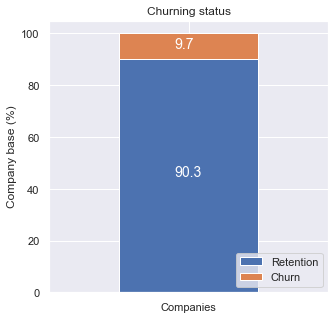

In [10]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

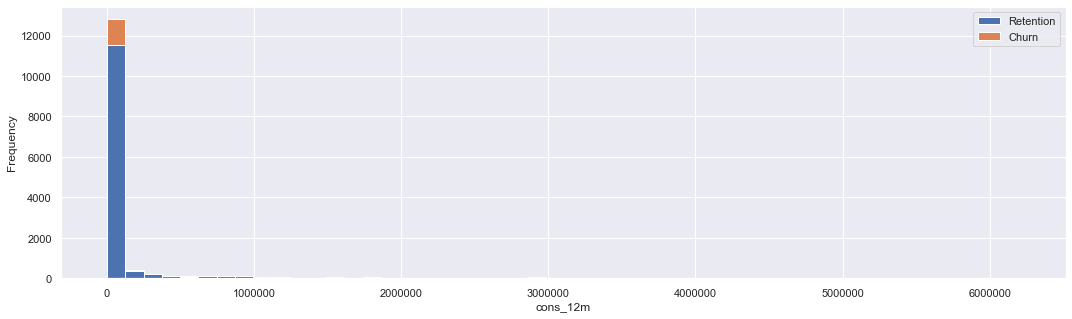

In [11]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_12m', axs)

### Clients Distribution through Main Fixed Price

There are two main price groups where demand-price curves resonably appears, which is (approximately) \$40.5-42.5 and \$43.5-46. In these two price groups, demand decreases (churn increases) according to price increment.

,group id,value range,num of clients,churn rate
0,0,"(30.54666375, 30.7382605941)",2,0.000000
1,17,"(33.8038100991, 33.9954069432)",11,0.090909
2,18,"(33.9954069432, 34.1870037873)",5,0.400000
3,33,"(36.8693596042, 37.0609564483)",1,1.000000
4,34,"(37.0609564483, 37.2525532923)",4,0.000000
5,35,"(37.2525532923, 37.4441501364)",4,0.000000
6,36,"(37.4441501364, 37.6357469805)",3,0.000000
7,38,"(37.8273438245, 38.0189406686)",2,0.000000
8,51,"(40.3181027974, 40.5096996415)",3,0.333333
9,52,"(40.5096996415, 40.7012964855)",3721,0.108304


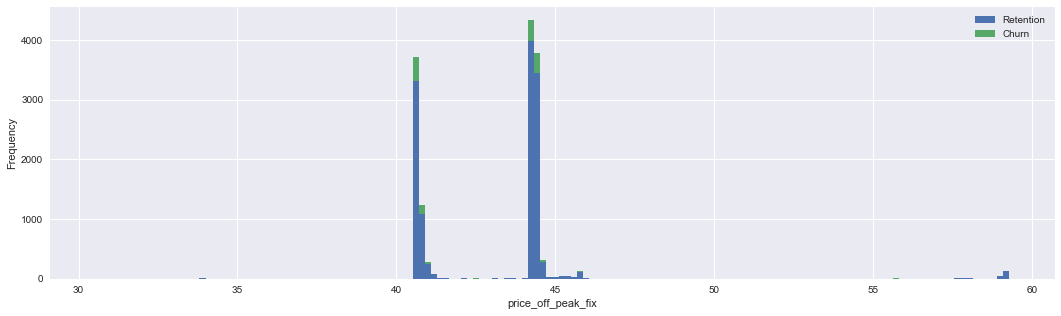

In [65]:
fig, axs = plt.subplots(nrows=1, figsize=(18, 5))
plot_distribution(price_avg_fix, 'price_off_peak_fix', axs, bins_=150)
churn_rate_by_group(price_avg_fix, 'price_off_peak_fix',150)

### Clients Distribution through Main Variable Price

Number of clients peaks at several price levels groups, clients don't seem to display much sensitivity on variable elctricity price. However, clients with average variable price at (0.1185,0.1296) seem easier to churn than a higher level of price at (0.1435,0.1518).

,group id,value range,num of clients,churn rate
0,0,"(0.0006, 0.00198749083333)",80,0.000000
1,13,"(0.0186373808333, 0.0200248716667)",1,0.000000
2,19,"(0.0269623258333, 0.0283498166667)",1,0.000000
3,33,"(0.0463871975, 0.0477746883333)",1,0.000000
4,54,"(0.075524505, 0.0769119958333)",2,0.000000
5,70,"(0.0977243583333, 0.0991118491667)",1,0.000000
6,72,"(0.10049934, 0.101886830833)",6,0.000000
7,73,"(0.101886830833, 0.103274321667)",5,0.400000
8,74,"(0.103274321667, 0.1046618125)",88,0.034091
9,75,"(0.1046618125, 0.106049303333)",22,0.272727


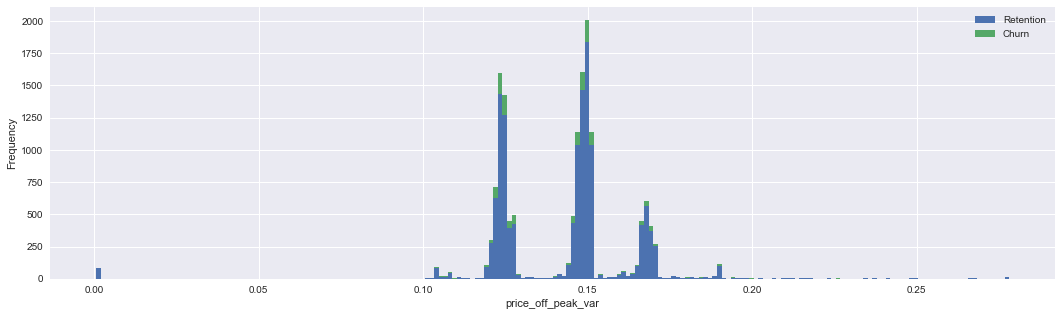

In [67]:
fig, axs = plt.subplots(nrows=1, figsize=(18, 5))
plot_distribution(price_avg_var, 'price_off_peak_var', axs, bins_=200)
churn_rate_by_group(price_avg_var, 'price_off_peak_var',200)

### Clients Distribution through Number of Price Change in 2015

Num of price change in 2015 doesn't seem to affect clients' churn rate much. Most clients experienced 2-3 price changes in 2015.

,group id,value range,num of clients,churn rate
0,0,"(0.0, 1.0)",1401,0.101356
1,1,"(1.0, 2.0)",5573,0.099946
2,2,"(2.0, 3.0)",7055,0.092275
3,3,"(3.0, 4.0)",481,0.122661
4,4,"(4.0, 5.0)",86,0.093023
5,5,"(5.0, 6.0)",8,0.250000
6,6,"(6.0, 7.0)",1,0.000000


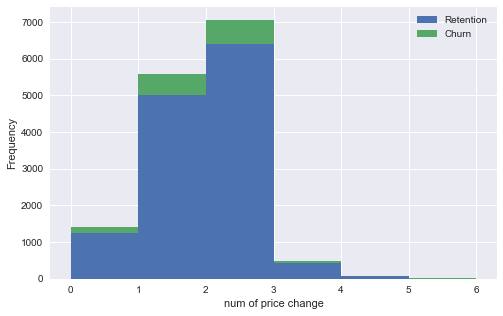

In [66]:
fig, axs = plt.subplots(nrows=1, figsize=(8, 5))
plot_distribution(price_by_id, 'num of price change', axs, bins_=6)
churn_rate_by_group(price_by_id,'num of price change',6)

### Clients Distribution through Rate of Price Change

First, we notice that the churn rate of clients experiencing positive rates of price change seems to be even little higher than those with negative rates. Maybe the one-time calculated price change should be combined with other factors to explain churn rate.

Churn rate for clients experienced negative price change:0.09978441638435478
Churn rate for clients experienced positive price change:0.09731603270529683


,group id,value range,num of clients,churn rate
0,0,"(-1.0, -0.970370194137)",7,0.142857
1,23,"(-0.318514465141, -0.288884659277)",1,0.000000
2,25,"(-0.259254853414, -0.22962504755)",4,0.500000
3,30,"(-0.111105824096, -0.0814760182329)",10,0.000000
4,31,"(-0.0814760182329, -0.0518462123695)",14,0.071429
5,32,"(-0.0518462123695, -0.022216406506)",35,0.114286
6,33,"(-0.022216406506, 0.00741339935743)",12737,0.096648
7,34,"(0.00741339935743, 0.0370432052209)",807,0.100372
8,35,"(0.0370432052209, 0.0666730110843)",761,0.107753
9,36,"(0.0666730110843, 0.0963028169478)",70,0.128571


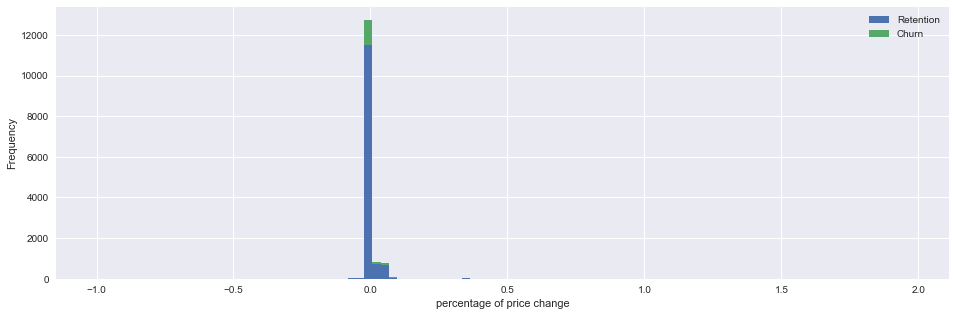

In [69]:
negative_churn = price_by_id["churn"][price_by_id["percentage of price change"]<=0].mean()
positive_churn = price_by_id["churn"][price_by_id["percentage of price change"]>0].mean()
print("Churn rate for clients experienced negative price change:"+str(negative_churn))
print("Churn rate for clients experienced positive price change:"+str(positive_churn))
fig, axs = plt.subplots(nrows=1, figsize=(16, 5))
plot_distribution(price_by_id, 'percentage of price change', axs, bins_=100)
churn_rate_by_group(price_by_id, 'percentage of price change',100)